In [9]:
# Read the file
data = []
with open('kn.her2.all', 'r') as file:
    for line in file:
        parts = line.split()
        pair = parts[0]
        dde = float(parts[1])
        de1 = float(parts[3])
        de2 = float(parts[4])
        data.append((pair, dde, de1, de2))

for i, row in enumerate(data):
    pair, dde, de1, de2 = row
    de12 = dde + de1 + de2
    data[i] = (pair, dde, de1, de2, de12)


In [10]:
print(data[:5])

[('A1B-B2A', 0.012168, -8.38054968975, -12.211337151, -20.579718840749997), ('A1B-B2C', -0.000907891, -8.38054968975, -8.17965538055, -16.5611129613), ('A1B-B2D', 0.000124631, -8.38054968975, -8.33986726217, -16.72029232092), ('A1B-A3B', 0.00878509, -8.38054968975, -6.41973451525, -14.791499115), ('A1B-A3C', 0.00893699, -8.38054968975, -5.49322355539, -13.864836255139998)]


find five rows with dde around : -2.3, -1, 0 , 1, 6

In [17]:
# Define the target dde values and the tolerance
target_dde_values = [-2.3, -1, 0, 1, 6]
tolerance = 0.08

# Find one row for each target value
unique_rows = []
for target in target_dde_values:
    for row in data:
        if abs(row[1] - target) <= tolerance:
            unique_rows.append(row)
            break  # Stop after finding the first match

# Display the rows
for target, row in zip(target_dde_values, unique_rows):
    print(f"Row with dde value around {target}: {row}")

Row with dde value around -2.3: ('D39A-B256A', -2.31533, -4.2870167233, -2.75427107699, -9.35661780029)
Row with dde value around -1: ('B6A-D119B', -1.03091, -9.06889346242, -2.99199003726, -13.091793499680001)
Row with dde value around 0: ('A1B-B2A', 0.012168, -8.38054968975, -12.211337151, -20.579718840749997)
Row with dde value around 1: ('B2A-C124A', 1.07828, -12.211337151, -0.429158587009, -11.562215738009002)
Row with dde value around 6: ('B6A-C7B', 6.06472, -9.06889346242, -5.61920403084, -8.62337749326)


use the d12 value above as z axis

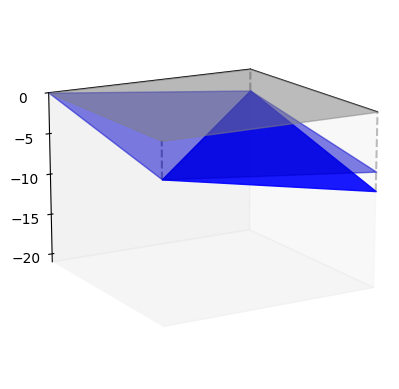

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import matplotlib.pyplot as plt

xy_base = 21
de1 = -4.2870167233
de2 = -2.75427107699
de12 = -9.35661780029
# Define the vertices of the triangle
vertices = [[0, 0, 0], [0, xy_base, de1], [xy_base, 0, de2]]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

################### Add the first triangle to the plot ###########################
triangle = Poly3DCollection([vertices], alpha=0.5,color='mediumblue')
ax.add_collection3d(triangle)

# Set the limits and labels
ax.set_xlim([0, xy_base])  # Reverse the x-axis
ax.set_ylim([xy_base, 0])
ax.set_zlim([-xy_base, 0])
ax.xaxis.set_ticks_position('upper')
ax.yaxis.set_ticks_position('upper')
ax.view_init(elev=15, azim=240)  # Rotate the graph counterclockwise by 30 degrees
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

###################################################################################



################## Define the vertices of the second triangle######################
vertices2 = [[xy_base, 0, de2], [0, xy_base, de1], [xy_base, xy_base, de12]]

# Add the second triangle to the plot
triangle2 = Poly3DCollection([vertices2], alpha=0.9, color='blue')
ax.add_collection3d(triangle2)
# Show the plot
####################################################################################


######## Plot straight lines from each vertex of the triangles to the xy surface#####
for vertex in vertices + vertices2:
    x, y, z = vertex
    ax.plot([x, x], [y, y], [z, 0], alpha=0.5,color='gray', linestyle='--')
####################################################################################


################## Define the vertices of the square ###############################
square_vertices = [[0, 0, 0], [0, xy_base, 0], [xy_base, xy_base, 0], [xy_base, 0, 0]]

# Add the square to the plot
square = Poly3DCollection([square_vertices], alpha=0.5, color='gray', edgecolor='gray')
ax.add_collection3d(square)
#####################################################################################


##################add dde = 0 triangle##################################################
#add a plot a triangle with verticies (0,xybase,de1) (xybase, 0, de2)(xybase,xybase, de1+de2)
# Define the vertices of the new triangle
vertices3 = [[0, xy_base, de1], [xy_base, 0, de2], [xy_base, xy_base, de1 + de2]]

# Add the new triangle to the plot
triangle3 = Poly3DCollection([vertices3], alpha=0.5, color='mediumblue')
ax.add_collection3d(triangle3)



#######################################################################################
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_zticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

In [197]:
def plot_3d_triangles(xy_base, de1, de2, de12):
    import matplotlib.pyplot as plt
# Adjust the figure size to make the canvas larger for annotations
    # Define the vertices of the first triangle
    plane_color = 'darkgreen'
    vertices = [[0, 0, 0], [0, xy_base, de1], [xy_base, 0, de2]]

    # Create a 3D plot
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    ax = fig.add_subplot(111, projection='3d')

    # Add the first triangle to the plot
    triangle = Poly3DCollection([vertices], alpha=0.5, color=plane_color)
    ax.add_collection3d(triangle)

    # Set the limits and labels
    ax.set_xlim([0, xy_base])
    ax.set_ylim([xy_base, 0])
    ax.set_zlim([-xy_base, 0])
    ax.xaxis.set_ticks_position('upper')
    ax.yaxis.set_ticks_position('upper')
    ax.view_init(elev=5, azim=240)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('ΔE', rotation=90)

    # Define the vertices of the second triangle
    vertices2 = [[xy_base, 0, de2], [0, xy_base, de1], [xy_base, xy_base, de12]]

    # Add the second triangle to the plot
    color = 'red' if dde < 0 else 'blue'
    triangle2 = Poly3DCollection([vertices2], alpha=0.5, color=color)
    ax.add_collection3d(triangle2)

    # Plot straight lines from each vertex of the triangles to the xy surface
    for vertex in vertices + vertices2:
        x, y, z = vertex
        ax.plot([x, x], [y, y], [z, 0], alpha=0.5, color='gray', linestyle='--')

    # Define the vertices of the square
    square_vertices = [[0, 0, 0], [0, xy_base, 0], [xy_base, xy_base, 0], [xy_base, 0, 0]]

    # Add the square to the plot
    square = Poly3DCollection([square_vertices], alpha=0.5, color='gray', edgecolor='gray')
    ax.add_collection3d(square)

    # Add a triangle with vertices (0, xy_base, de1), (xy_base, 0, de2), (xy_base, xy_base, de1 + de2)
    vertices3 = [[0, xy_base, de1], [xy_base, 0, de2], [xy_base, xy_base, de1 + de2]]
    triangle3 = Poly3DCollection([vertices3], alpha=0.5, color=plane_color)
    ax.add_collection3d(triangle3)

    # add dde lable:
    # Draw a solid line between the x-coordinates of the second and third triangle
    line_color = 'blue' if dde > 0 else 'red'
    ax.plot([vertices2[2][0], vertices3[2][0]],  # x-coordinates
            [vertices2[2][1], vertices3[2][1]],  # y-coordinates
            [vertices2[2][2], vertices3[2][2]],  # z-coordinates
            color=line_color, linewidth=2)

    # Label the ΔΔE value
    label_position = [(vertices2[2][0] + vertices3[2][0]) / 2,
                      (vertices2[2][1] + vertices3[2][1]) / 2,
                      min(vertices2[2][2], vertices3[2][2]) - 2]  # Adjusted Z position to be slightly below the bottom of the line
    ax.text(label_position[0], label_position[1], label_position[2],
            f"ΔΔE: {dde:.2f}", color=line_color, fontsize=10, ha='center')
    
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    plt.show()

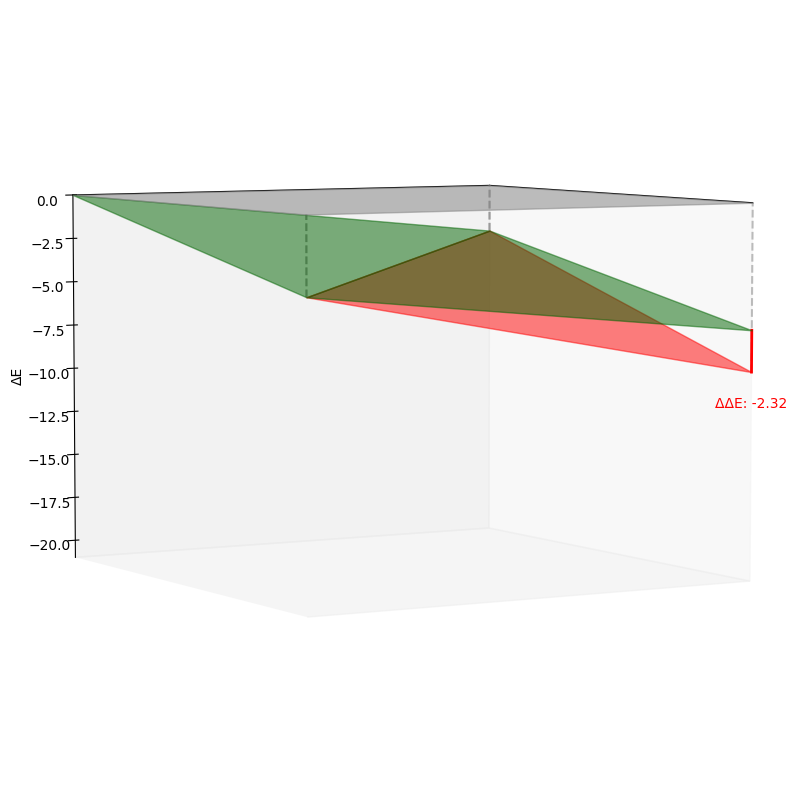

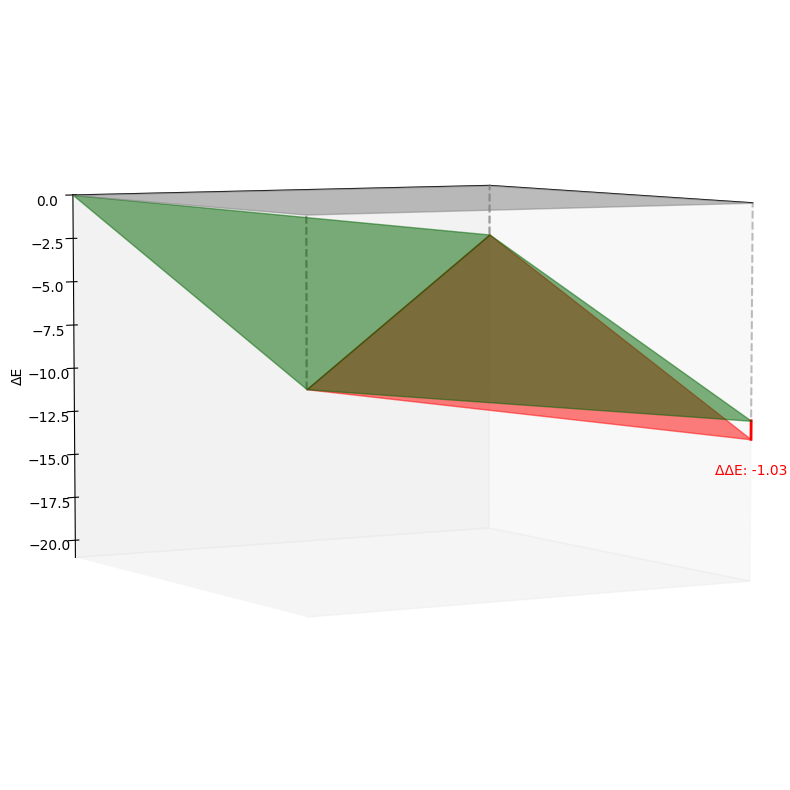

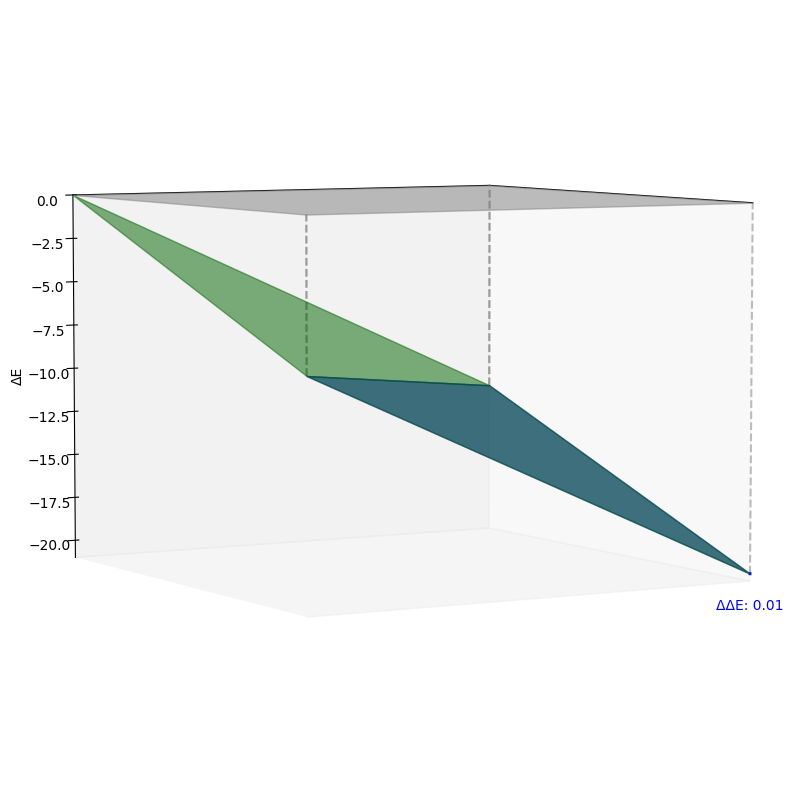

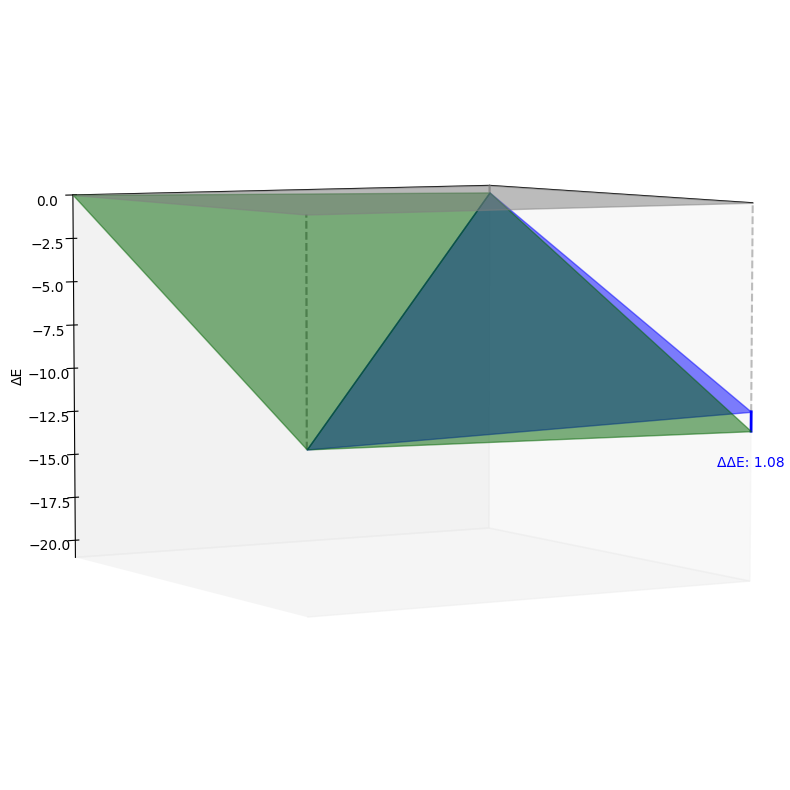

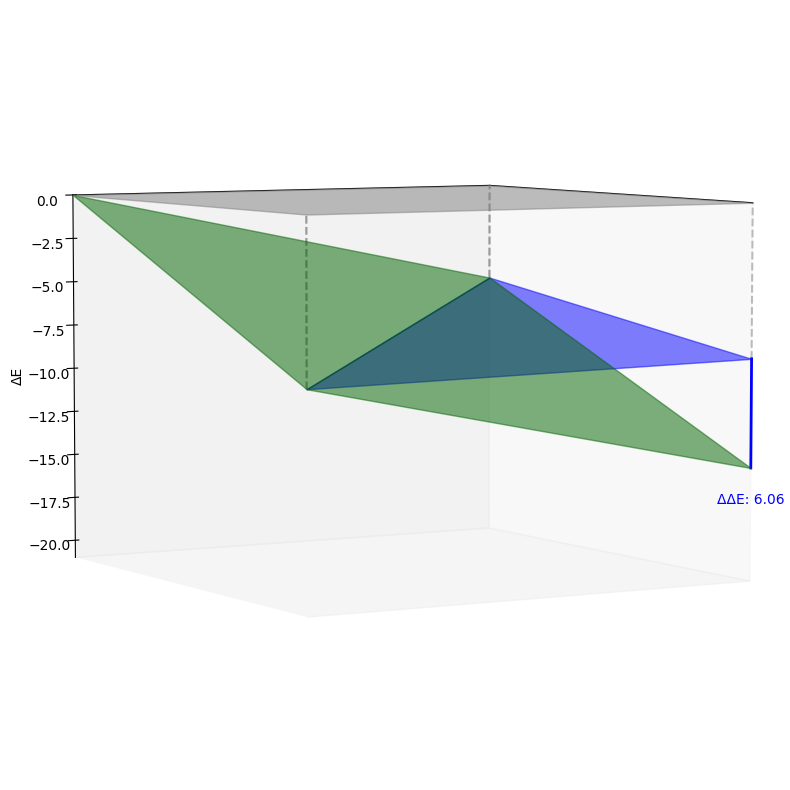

In [198]:

rows_to_plot = [
    ('D39A-B256A', -2.31533, -4.2870167233, -2.75427107699, -9.35661780029),
    ('B6A-D119B', -1.03091, -9.06889346242, -2.99199003726, -13.091793499680001),
    ('A1B-B2A', 0.012168, -8.38054968975, -12.211337151, -20.579718840749997),
    ('B2A-C124A', 1.07828, -12.211337151, -0.429158587009, -11.562215738009002),
    ('B6A-C7B', 6.06472, -9.06889346242, -5.61920403084, -8.62337749326)
]

# Plot each row as a triangle
for row in rows_to_plot:
    _, dde, de1, de2, de12 = row
    plot_3d_triangles(xy_base, de1, de2, de12)
